<a href="https://colab.research.google.com/github/Rodrigo-GP/ube/blob/main/Videoconf-7_NVIDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!uv pip install -q --system numba-cuda==0.4.0 --force-reinstall
from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1
from numba import cuda
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
gpu = cuda.get_current_device()
print("name = %s" % gpu.name)
print("maxThreadsPerBlock = %s" % str(gpu.MAX_THREADS_PER_BLOCK))
print("maxBlockDimX = %s" % str(gpu.MAX_BLOCK_DIM_X))
print("maxBlockDimY = %s" % str(gpu.MAX_BLOCK_DIM_Y))
print("maxBlockDimZ = %s" % str(gpu.MAX_BLOCK_DIM_Z))
print("maxGridDimX = %s" % str(gpu.MAX_GRID_DIM_X))
print("maxGridDimY = %s" % str(gpu.MAX_GRID_DIM_Y))
print("maxGridDimZ = %s" % str(gpu.MAX_GRID_DIM_Z))
print("maxSharedMemoryPerBlock = %s" % str(gpu.MAX_SHARED_MEMORY_PER_BLOCK))
print("asyncEngineCount = %s" % str(gpu.ASYNC_ENGINE_COUNT))
print("canMapHostMemory = %s" % str(gpu.CAN_MAP_HOST_MEMORY))
print("multiProcessorCount = %s" % str(gpu.MULTIPROCESSOR_COUNT))
print("warpSize = %s" % str(gpu.WARP_SIZE))
print("unifiedAddressing = %s" % str(gpu.UNIFIED_ADDRESSING))
print("pciBusID = %s" % str(gpu.PCI_BUS_ID))
print("pciDeviceID = %s" % str(gpu.PCI_DEVICE_ID))

name = b'Tesla T4'
maxThreadsPerBlock = 1024
maxBlockDimX = 1024
maxBlockDimY = 1024
maxBlockDimZ = 64
maxGridDimX = 2147483647
maxGridDimY = 65535
maxGridDimZ = 65535
maxSharedMemoryPerBlock = 49152
asyncEngineCount = 3
canMapHostMemory = 1
multiProcessorCount = 40
warpSize = 32
unifiedAddressing = 1
pciBusID = 0
pciDeviceID = 4


In [7]:
!wget https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/01-nvidia-logo-horiz-500x200-2c50-d.png
im = plt.imread("01-nvidia-logo-horiz-500x200-2c50-d.png")

--2026-02-26 18:12:53--  https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/01-nvidia-logo-horiz-500x200-2c50-d.png
Resolving www.nvidia.com (www.nvidia.com)... 173.222.162.171, 173.222.162.170, 173.222.162.132, ...
Connecting to www.nvidia.com (www.nvidia.com)|173.222.162.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17129 (17K) [image/png]
Saving to: ‘01-nvidia-logo-horiz-500x200-2c50-d.png.1’

01-nvidia-logo-hori 100%[===================>]  16.73K  --.-KB/s    in 0.002s  

2026-02-26 18:12:53 (8.78 MB/s) - ‘01-nvidia-logo-horiz-500x200-2c50-d.png.1’ saved [17129/17129]



In [8]:
from urllib import request
url = "https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/01-nvidia-logo-horiz-500x200-2c50-d.png"
output_file = "output_file.png"
request.urlretrieve(url, output_file)
im = plt.imread(output_file)

(354, 630, 4)


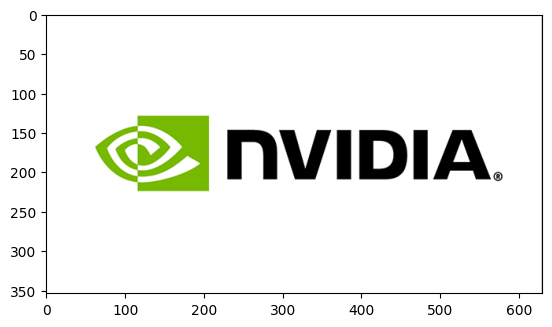

In [9]:
plt.imshow(im)
print(im.shape)

In [10]:
numero_filas = im.shape[0]
numero_columnas = im.shape[1]
numero_color = im.shape[2]

imagen_transformada_verdes = np.zeros(im.shape)
imagen_transformada_verdes = np.zeros((numero_filas, numero_columnas, numero_color))

# 0 - RED
# 1 - GREEN
# 2 - BLUE
# 3 - OPACIDAD

for i in range(numero_filas):
    for j in range(numero_columnas):
        imagen_transformada_verdes[i][j][1] = im[i][j][1]
        imagen_transformada_verdes[i][j][3] = 0.25

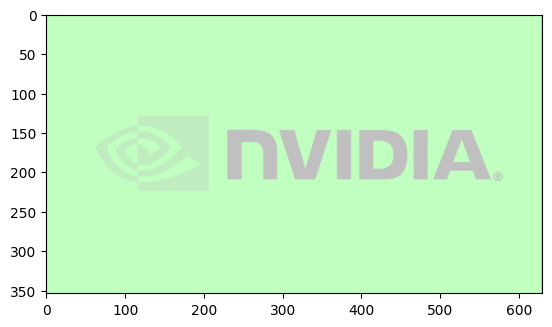

In [11]:
plt.imshow(imagen_transformada_verdes)